# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

Biblioteca de importação

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carregando arquivo

In [25]:
df_previsao_de_renda = pd.read_csv('previsao_de_renda.csv')

In [26]:
df_previsao_de_renda

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [27]:
df_previsao_de_renda.columns

Index(['Unnamed: 0', 'data_ref', 'index', 'sexo', 'posse_de_veiculo',
       'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'mau', 'renda'],
      dtype='object')

Excluindo colunas que não são do interesse para a análise e salvando em um novo dataframe. 

In [28]:
df_previsao_de_renda_drop = df_previsao_de_renda.drop(['Unnamed: 0', 'index', 'mau'], axis = 1)

In [29]:
df_previsao_de_renda_drop 

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,3369.24
1,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,6096.14
2,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,5658.98
3,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,7246.69
4,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,1193.29
14996,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,2519.18
14997,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,1586.85
14998,2016-03-01,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,6975.39


In [30]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [31]:
df_previsao_numeric = df_previsao_de_renda_drop.select_dtypes(include=numerics)

In [32]:
df_previsao_numeric.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


C:\Users\OPERACIONAL\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


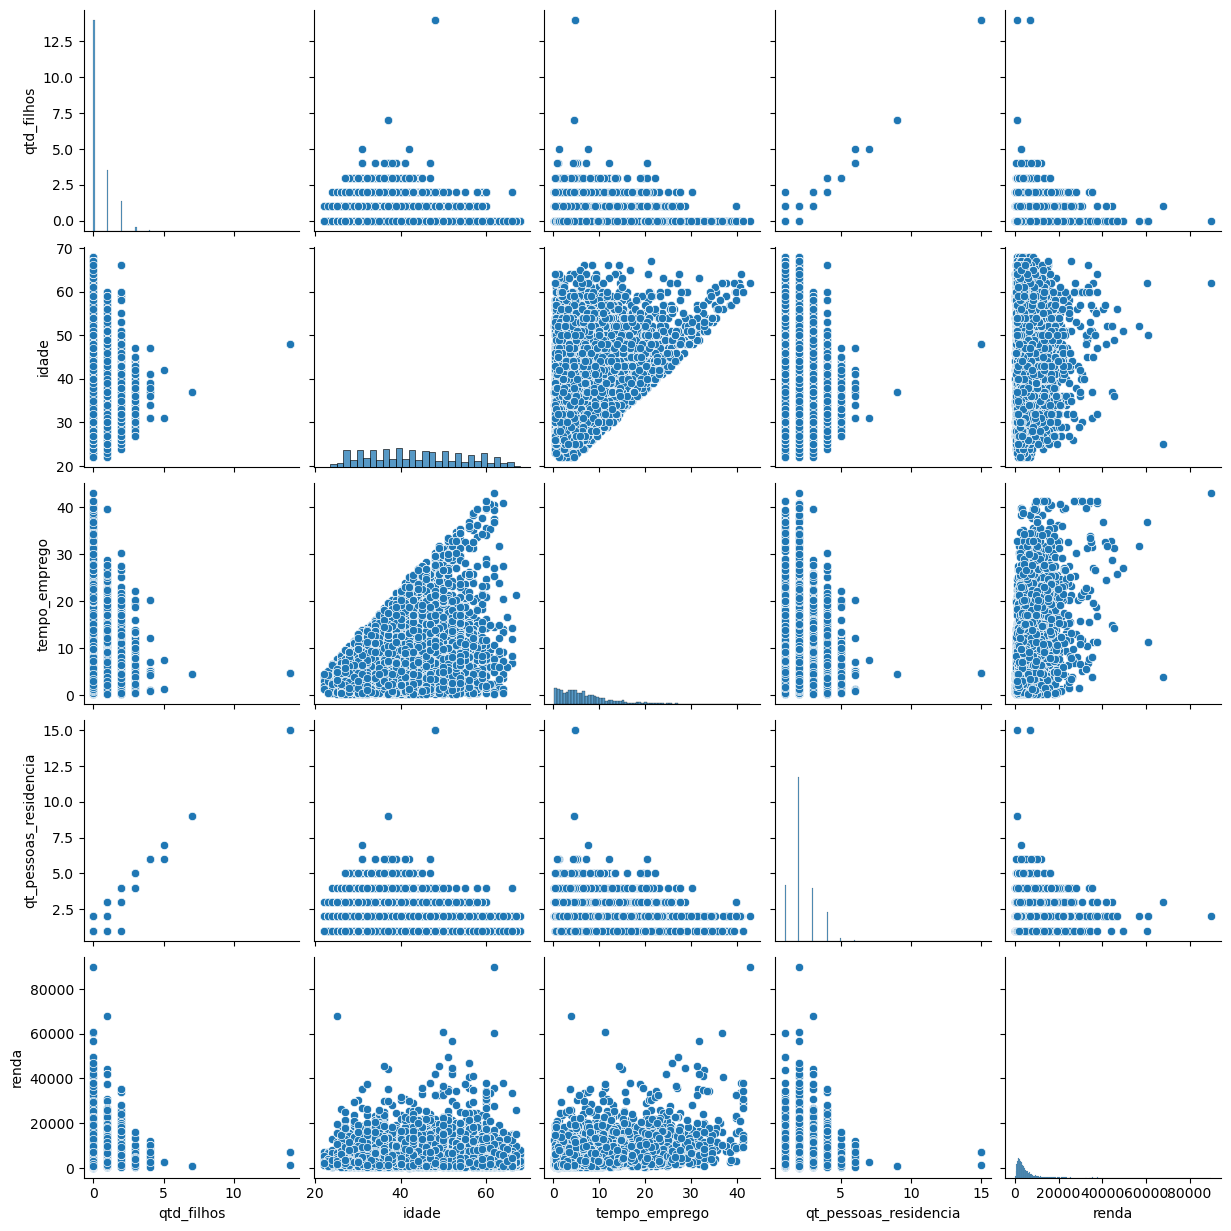

In [40]:
sns.pairplot(df_previsao_numeric)

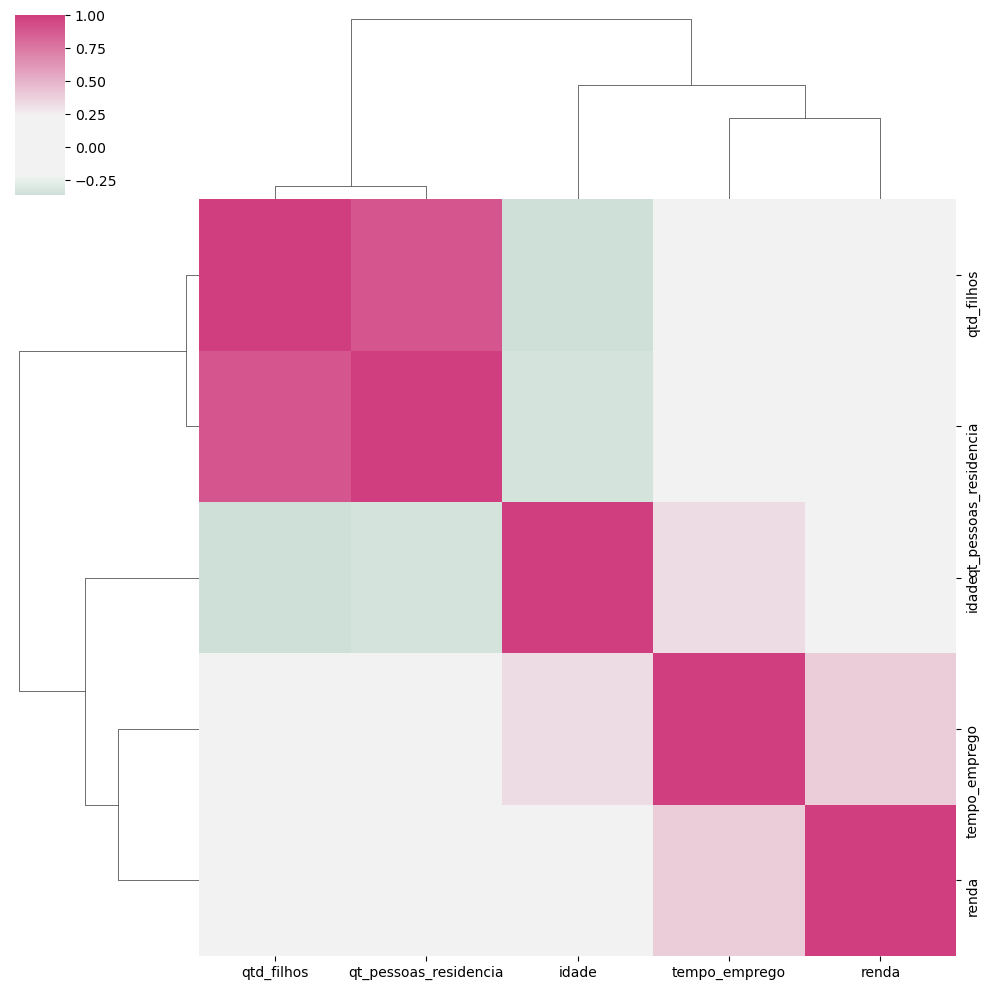

In [56]:
cmap = sns.diverging_palette(h_neg=150, h_pos=350, as_cmap=True, sep = 60, center = 'light')

sns.clustermap(df_previsao_numeric.corr(), figsize=(10, 10), center = 0, cmap=cmap)

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

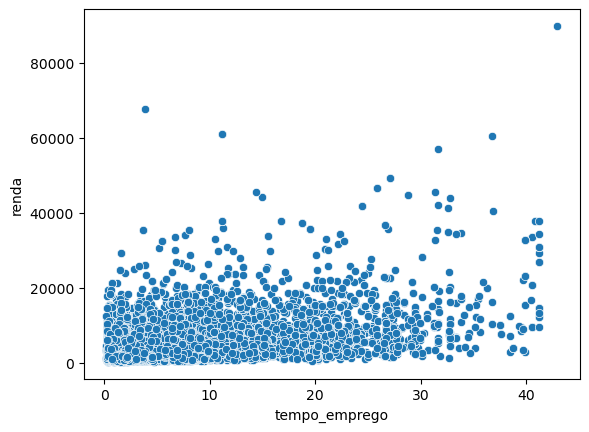

In [55]:
sns.scatterplot(df_previsao_de_renda_drop, x='tempo_emprego', y='renda')
plt.show()

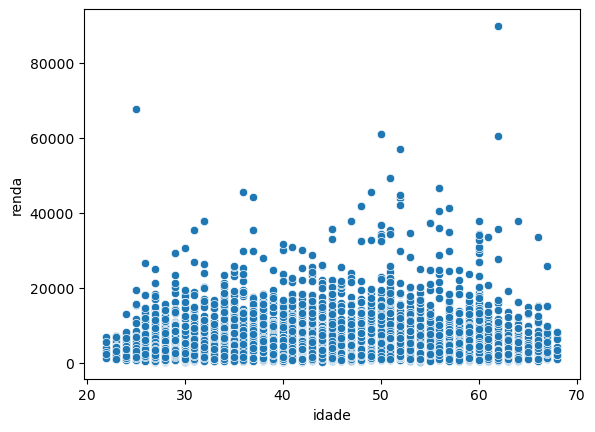

In [35]:
sns.scatterplot(df_previsao_de_renda_drop, x='idade', y='renda')
plt.show()

3) Na su aopinião, há outliers na variável renda?

**Sim, os outliers presentes na variável renda são notáveis quando relacionados com a variável idade, estão acima de 60000 de renda, e quando relacionados a variável tempo_emprego o outlier aparece acima do 80000 de renda.**

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [36]:
# gerando uma cópia do dataframe 
df_log = df_previsao_numeric.copy()

In [37]:
#aplicando a função de LOG
df_log['log_y'] = np.log(df_log['renda'])

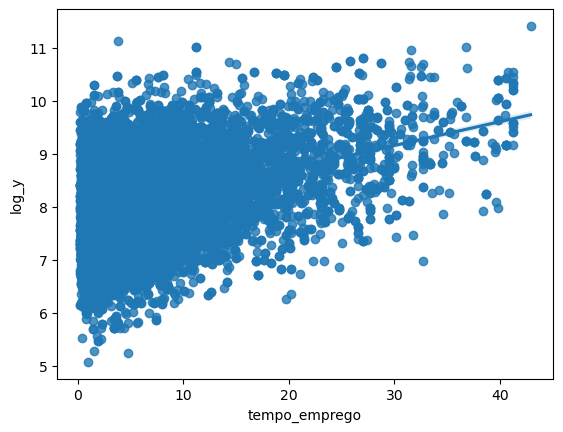

In [58]:
_ = sns.regplot(x='tempo_emprego', y='log_y', data = df_log)

<Axes: xlabel='idade', ylabel='log_y'>

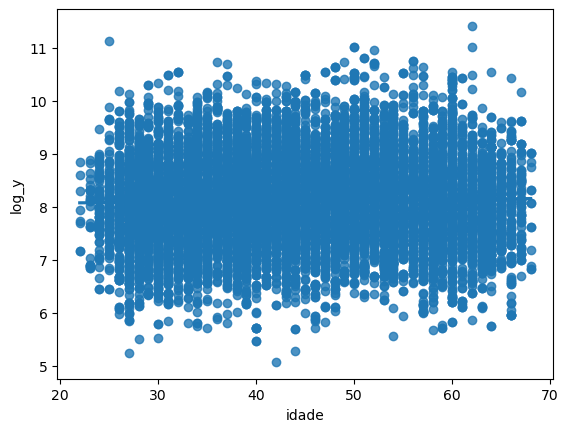

In [59]:
sns.regplot(x='idade', y='log_y', data = df_log)

In [60]:
df_log.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_y
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023743
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024712
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379556
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835734
log_y,0.023743,0.024712,0.379556,0.036267,0.835734,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

**Com o LOG foi possível observar que a correlação entre tempo_emprego e renda é positiva, e na variável idade a distribuição
se mostrou mais simetrica quando calculada o LOG.**